$\newcommand{\ket}[1]{\left|#1\right>}$

$\newcommand{\bra}[1]{\left<#1\right|}$

$\newcommand{\braket}[2]{\left<#1 | #2\right>}$

$\newcommand{\expectation}[1]{\left<#1\right>}$

# Larger Circuits

Everything here is taken from the IBM quantum computing User Guide and introduction to quantum computing:

https://quantum-computing.ibm.com/docs/guide/q-algos/basic-circuit-identities-and-larger-circuits

Now that we understood the basis of quantum mechanics and how it influences quantum computing, we can start making some exercises to see how to exploit what we learned for actual computing. 

## Inverse $CNOT$ gate

A $CNOT$ gate can be inverted, so that the target qbit becomes the control qbit.

We can do it by applying two $H$ gates to each of the two qbits involved, one before and one after the $CNOT$ gate.

In [50]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ

# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
inv_cnot = QuantumCircuit(q, c)

# Put the second qbit in the |1> state so it can control the first qbit
inv_cnot.x(1)

inv_cnot.barrier()

# Put a CNOT gate with qbit-0 as control and qbit-1 as target.
# Invert the roles through the 4 H gates
inv_cnot.h(0)
inv_cnot.h(1)
inv_cnot.cnot(0,1)
inv_cnot.h(0)
inv_cnot.h(1)

inv_cnot.barrier()

inv_cnot.measure(q, c)

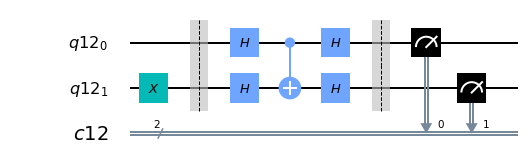

In [51]:
# Draw the circuit
inv_cnot.draw(output='mpl')

In [52]:
# Execute the circuit
job = execute(inv_cnot, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [53]:
# Print the result
print(result.get_counts(inv_cnot))

{'11': 1024}


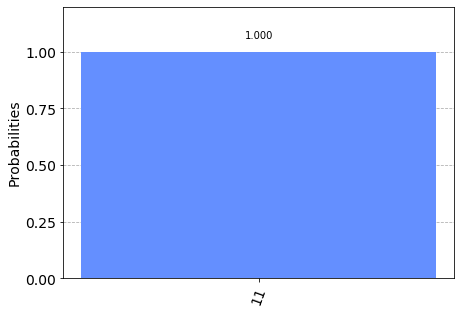

In [54]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(inv_cnot))

Of course, this is equivalent to put a $CNOT$ gate explicitly connecting the second qbit as control to the first qbit as target. 

In [55]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ

# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
inv_cnot2 = QuantumCircuit(q, c)

# Put the second qbit in the |1> state so it can control the first qbit
inv_cnot2.x(1)

inv_cnot2.barrier()

# Use the qbit-1 to control the qbit-0 through a cnot 
inv_cnot2.cnot(1,0)

inv_cnot2.barrier()

inv_cnot2.measure(q, c)

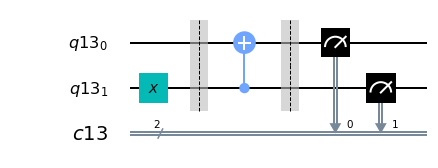

In [56]:
# Draw the circuit
inv_cnot2.draw(output='mpl')

In [57]:
# Execute the circuit
job = execute(inv_cnot2, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [58]:
# Print the result
print(result.get_counts(inv_cnot2))

{'11': 1024}


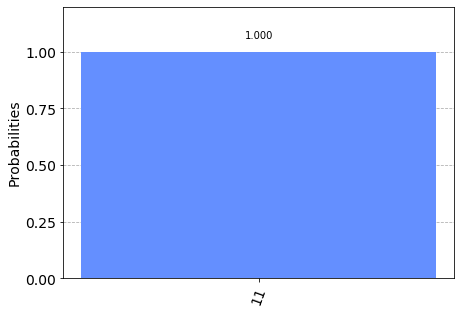

In [59]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(inv_cnot2))

## Swapping qbits states

We can swap the states of two qbits by applying three $CNOT$ gates as:

$SWAP_{12} = CNOT_{12} CNOT_{21} CNOT_{12}$

To understand how it works, let's consider the four possible cases:

- $\ket{00}$: since both qbits are in the $\ket{0}$ state, nothing happens, as expected;
- $\ket{11}$: the first qbit (control qbit for the first $CNOT$ gate) is in the $\ket{1}$ state, so it flips the state of the second qbit to $\ket{0}$. This means that the second $CNOT$ gate, controlled by the second qbit, does nothing. Finally, the third $CNOT$ gate, controlled by the first qbit, flips the second qbit state to $\ket{1}$. So no changes, as expected;
- $\ket{10}$: the first $CNOT$ gate is activated by the first qbit in the $\ket{1}$ state and flips the second qbit to $\ket{1}$. This makes the second $CNOT$ gate active, so that the first qbit is flipped to $\ket{0}$ and the third $CNOT$ gate does nothing. The final state is thus $\ket{01}$;
- $\ket{01}$: the first $CNOT$ gate is not active since the first qbit is in the $\ket{0}$ state. The second $CNOT$ gate, activated by the second qbit, acts on the first qbit and put it in the $\ket{1}$ state, so that the third $CNOT$ gate becomes active and flips the second qbit to $\ket{0}$. We end up in the $\ket{10}$ state.


### Example 1 - start from $\ket{01}$ state

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ

# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
swap = QuantumCircuit(q, c)

# Put the system in the |01> state
swap.x(0)

swap.barrier()

# Build the SWAP gate
swap.cnot(0,1)
swap.cnot(1,0)
swap.cnot(0,1)

swap.barrier()

swap.measure(q, c)

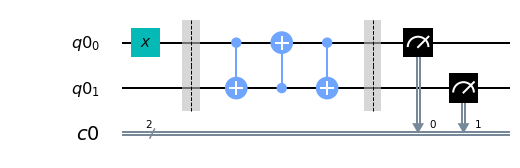

In [2]:
# Draw the circuit
swap.draw(output='mpl')

In [3]:
# Execute the circuit
job = execute(swap, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [4]:
# Print the result
print(result.get_counts(swap))

{'10': 1024}


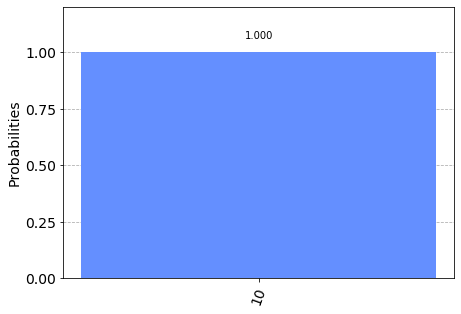

In [5]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(swap))

### Example 2 - start from $\ket{10}$ state

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ

# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
swap2 = QuantumCircuit(q, c)

# Put the system in the |10> state
swap2.x(1)

swap2.barrier()

# Build the SWAP gate
swap2.cnot(0,1)
swap2.cnot(1,0)
swap2.cnot(0,1)

swap2.barrier()

swap2.measure(q, c)

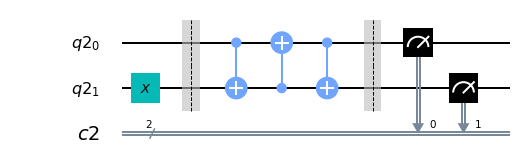

In [8]:
# Draw the circuit
swap2.draw(output='mpl')

In [9]:
# Execute the circuit
job = execute(swap2, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [10]:
# Print the result
print(result.get_counts(swap2))

{'01': 1024}


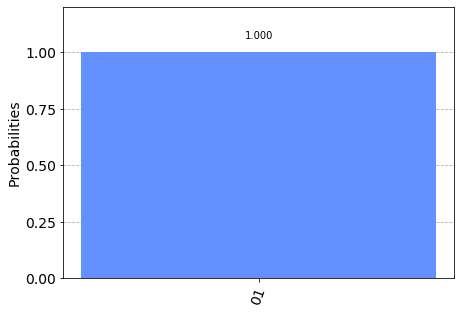

In [11]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(swap2))

## Adding a control qbit to a gate

In general, a $CNOT$ gate can be used to add a control qbit to a gate.

The $CNOT$ gate itself can be regarded as a controlled $X$ gate. 

This means that, if we want to use it as a tool for adding a control qbit to a gate $G$, we have to be able to find an operator $O$ such that:
- if the $CNOT$ gate is not active, nothing happens: $O^{-1}O = 1$;
- if the $CNOT$ gate is active, it produces the gate $G$: $G = O^{-1} X O$  

### Example: controlled Hadamard gate

To make things clearer, let's try with a simple example, by building a controlled $H$ gate.

We want to find an operator $O$ such that:
- $O^{-1}O = 1$;
- $H = O^{-1} X O$  

For this, it is easier to think at the $H$ gate as a rotation of 90$^{\circ}$ around the Y axis in the Bloch sphere representation. With this in mind, we can suppose that our $O$ operator is itself a rotation.

Let's also keep in mind that the X operator switches the $\ket{0}$ and $\ket{1}$ states.

So basically we want $O$ to be a rotation since:
- $O^{-1}O = 1$ (a rotation of an angle $\theta$ and a rotation of -$\theta$ does nothing);
- $H = O^{-1} X O$: we want a rotation around the Y axis such that if after this rotation we switch the state $\ket{0}$ with the state $\ket{1}$ in our qbit and then we apply a rotation in the other sense, we get a rotation of 90$^{\circ}$.

The solution is quite trivial, our $\theta$ angle must be 45$^{\circ}$. Let's see what happens when the $CNOT$ gate is active, since the other case is trivial:
- if we start with our target qbit in the $\ket{0}$ state and we apply a rotation of $\theta$ = 45$^{\circ}$ ($\frac{\pi}{4}$), we get a superposition of $\frac{\theta}{2}$ = $\frac{\pi}{8}$: <br>
$\ket{\psi} = \cos(\dfrac{\pi}{8})\ket{0} + \sin(\dfrac{\pi}{8})\ket{1}$

- then, we apply the $X$ gate and the target qbit state becomes: <br>
$\ket{\psi} = \sin(\dfrac{\pi}{8})\ket{0} + \cos(\dfrac{\pi}{8})\ket{1}$ = 
$\cos(\dfrac{\pi}{2} - \dfrac{\pi}{8})\ket{0} + \sin(\dfrac{\pi}{2} - \dfrac{\pi}{8})\ket{1}$ = 
$\cos(3\dfrac{\pi}{8})\ket{0} + \sin(3\dfrac{\pi}{8})\ket{1}$

- finally, we apply a rotation of -$\theta$ = 45$^{\circ}$, obtaining: <br> 
$\cos((3 - 1)\dfrac{\pi}{8})\ket{0} + \sin((3 - 1)\dfrac{\pi}{8})\ket{1}$ = 
$\cos(\dfrac{\pi}{4})\ket{0} + \sin(\dfrac{\pi}{4})\ket{1}$ = 
$\dfrac{\ket{0} + \ket{1}}{\sqrt{2}}$

Now we can verify it with a piece of code.

### Control qbit in the $\ket{0}$ state

Since the control qbit is in the $\ket{0}$ state, we do not expect any change in the state of the target qbit.

<span style="color:red"> QISKIT inverts the order of the qbits when showing results: you have to read them from right to left. </span>

In [48]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import numpy as np

# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
controlled_h = QuantumCircuit(q, c)

# Keep first qbit in the |0> state: nothing should happen

controlled_h.barrier()

# Build the controlled H gate
controlled_h.u3(np.pi/4,0,0,1)
controlled_h.cnot(0,1)
controlled_h.u3(-np.pi/4,0,0,1)

controlled_h.barrier()

controlled_h.measure(q, c)

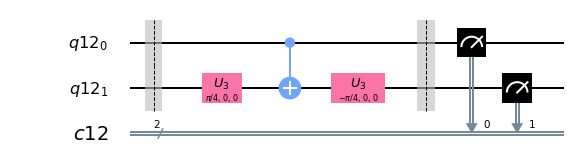

In [49]:
# Draw the circuit
controlled_h.draw(output='mpl')

In [50]:
# Execute the circuit
job = execute(controlled_h, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [51]:
# Print the result
print(result.get_counts(controlled_h))

{'00': 1024}


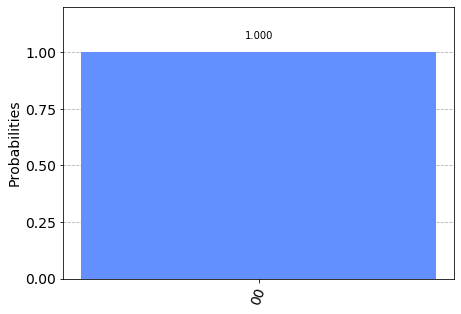

In [52]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(controlled_h))

### Control qbit in the $\ket{1}$ state

We are now putting the control qbit in the $\ket{1}$ state, so that we expect the target qbit state to be changed to $\ket{+}$.

<span style="color:red"> QISKIT inverts the order of the qbits when showing results: you have to read them from right to left. </span>

In [58]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import numpy as np

# Build the circuits

# Define the Quantum and Classical Registers
q = QuantumRegister(2)
c = ClassicalRegister(2)

# Create the circuit
controlled_h2 = QuantumCircuit(q, c)

# Put first qbit in the |1> state: second qbit goes to |+> state
controlled_h2.x(0)

controlled_h2.barrier()

# Build the controlled H gate
controlled_h2.u3(np.pi/4,0,0,1)
controlled_h2.cnot(0,1)
controlled_h2.u3(-np.pi/4,0,0,1)

controlled_h2.barrier()

controlled_h2.measure(q, c)

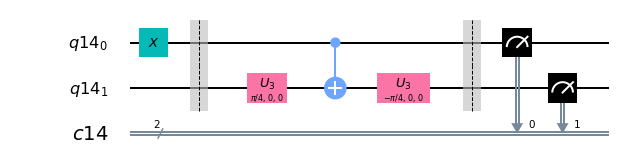

In [59]:
# Draw the circuit
controlled_h2.draw(output='mpl')

In [60]:
# Execute the circuit
job = execute(controlled_h2, 
              backend = Aer.get_backend('qasm_simulator'), 
              shots=1024)

result = job.result()

In [61]:
# Print the result
print(result.get_counts(controlled_h2))

{'01': 493, '11': 531}


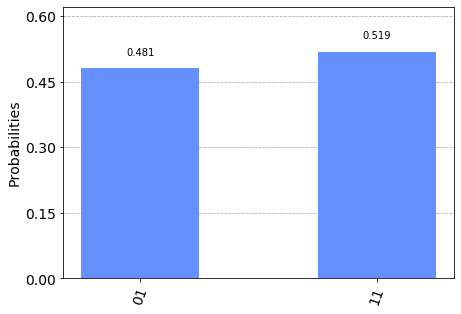

In [63]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(controlled_h2))